In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt 


### Google Search Data - Keywords
Eco friendly, ocean plastic, plastic pollution 

In [2]:
ggl_ecofriendly = pd.read_csv("./data/ggl_ecofriendly.csv")
ggl_oceanplastic = pd.read_csv("./data/ggl_oceanplastic.csv")
ggl_plasticpollution = pd.read_csv("./data/ggl_plasticpollution.csv")
ggl_reusable = pd.read_csv("./data/ggl_reusable.csv")

### Google Search Data - Flasks (Popular reusable waterbottles)
Hydro Flask, Yeti, Camelbak, Contigo, S'well

In [3]:
ggl_hydroflask = pd.read_csv("./data/ggl_hydroflask.csv")
ggl_yeti = pd.read_csv("./data/ggl_yeti.csv")
ggl_camelbak = pd.read_csv("./data/ggl_camelbak.csv")
ggl_contigo = pd.read_csv("./data/ggl_contigo.csv")
ggl_swell = pd.read_csv("./data/ggl_swell.csv")

### Google Search Data - Bottled Water (Popular Bottled Water brands)
Aquafina, Desani, Nestlé, Poland Springs, SmartWater

In [4]:
ggl_aquafina = pd.read_csv("./data/ggl_aquafina.csv")
ggl_dasani = pd.read_csv("./data/ggl_dasani.csv")
ggl_nestle = pd.read_csv("./data/ggl_nestle.csv")
ggl_polandspring = pd.read_csv("./data/ggl_polandspring.csv")
ggl_smartwater = pd.read_csv("./data/ggl_smartwater.csv")

### Clean Data & Merge - Keywords Search

In [5]:
ggl_ecofriendly = ggl_ecofriendly.drop("Week")
ggl_ecofriendly = ggl_ecofriendly.rename(columns = {"Category: All categories" : "Eco Friendly"})
ggl_ecofriendly["Eco Friendly"] = ggl_ecofriendly["Eco Friendly"].astype(int)

ggl_oceanplastic = ggl_oceanplastic.drop("Week")
ggl_oceanplastic = ggl_oceanplastic.rename(columns = {"Category: All categories" : "Ocean Plastic"})
ggl_oceanplastic["Ocean Plastic"] = ggl_oceanplastic["Ocean Plastic"].astype(int)

ggl_plasticpollution = ggl_plasticpollution.drop("Week")
ggl_plasticpollution = ggl_plasticpollution.rename(columns = {"Category: All categories" : "Plastic Pollution"})
ggl_plasticpollution["Plastic Pollution"] = ggl_plasticpollution["Plastic Pollution"].astype(int)

ggl_reusable = ggl_reusable.drop("Week")
ggl_reusable = ggl_reusable.rename(columns = {"Category: All categories" : "Reusable"})
ggl_reusable["Reusable"] = ggl_reusable["Reusable"].astype(int)

awareness_search = pd.concat([ggl_ecofriendly, ggl_oceanplastic, ggl_plasticpollution, ggl_reusable], axis=1)
awareness_search["Week"] = pd.to_datetime(awareness_search.index)
awareness_search.head() # 261 weeks

,Eco Friendly,Ocean Plastic,Plastic Pollution,Reusable,Week
2015-02-22,30,13,4,27,2015-02-22
2015-03-01,29,16,5,28,2015-03-01
2015-03-08,32,14,5,27,2015-03-08
2015-03-15,30,14,6,25,2015-03-15
2015-03-22,28,12,6,24,2015-03-22


### Clean Data & Merge - Flasks

In [6]:
ggl_hydroflask = ggl_hydroflask.drop("Week")
ggl_hydroflask = ggl_hydroflask.rename(columns = {"Category: All categories" : "Hydro Flask"})
ggl_hydroflask["Hydro Flask"] = ggl_hydroflask["Hydro Flask"].astype(int)

ggl_yeti = ggl_yeti.drop("Week")
ggl_yeti = ggl_yeti.rename(columns = {"Category: All categories" : "Yeti"})
ggl_yeti["Yeti"] = ggl_yeti["Yeti"].astype(int)

ggl_camelbak  = ggl_camelbak.drop("Week")
ggl_camelbak  = ggl_camelbak.rename(columns = {"Category: All categories" : "Camelbak"})
ggl_camelbak["Camelbak"] = ggl_camelbak["Camelbak"].astype(int)

ggl_contigo = ggl_contigo.drop("Week")
ggl_contigo = ggl_contigo.rename(columns = {"Category: All categories" : "Contigo"})
ggl_contigo["Contigo"] = ggl_contigo["Contigo"].astype(int)

ggl_swell = ggl_swell.drop("Week")
ggl_swell = ggl_swell.rename(columns = {"Category: All categories" : "Swell"})
ggl_swell["Swell"] = ggl_swell["Swell"].astype(int)

water_bottle = pd.concat([ggl_hydroflask, ggl_yeti, ggl_camelbak, ggl_contigo, ggl_swell], axis=1)
water_bottle["Week"] = pd.to_datetime(water_bottle.index)
water_bottle.head() # 261 weeks

,Hydro Flask,Yeti,Camelbak,Contigo,Swell,Week
2015-02-22,2,34,61,100,53,2015-02-22
2015-03-01,2,32,72,95,55,2015-03-01
2015-03-08,2,34,72,94,60,2015-03-08
2015-03-15,2,36,77,97,58,2015-03-15
2015-03-22,2,36,71,92,57,2015-03-22


### Clean Data & Merge - Bottled Water

In [7]:
ggl_aquafina = ggl_aquafina.drop("Week")
ggl_aquafina = ggl_aquafina.rename(columns = {"Category: All categories" : "Aquafina"})
ggl_aquafina["Aquafina"] = ggl_aquafina["Aquafina"].astype(int)

ggl_dasani = ggl_dasani.drop("Week")
ggl_dasani = ggl_dasani.rename(columns = {"Category: All categories" : "Dasani"})
ggl_dasani["Dasani"] = ggl_dasani["Dasani"].astype(int)

ggl_polandspring = ggl_polandspring.drop("Week")
ggl_polandspring = ggl_polandspring.rename(columns = {"Category: All categories" : "Poland Spring"})
ggl_polandspring["Poland Spring"] = ggl_polandspring["Poland Spring"].astype(int)

ggl_smartwater = ggl_smartwater.drop("Week")
ggl_smartwater = ggl_smartwater.rename(columns = {"Category: All categories" : "SmartWater"})
ggl_smartwater["SmartWater"] = ggl_smartwater["SmartWater"].astype(int)

bottled_water = pd.concat([ggl_aquafina, ggl_dasani, ggl_polandspring, ggl_smartwater], axis=1)
bottled_water["Week"] = pd.to_datetime(bottled_water.index)
bottled_water.head() # 261 weeks

,Aquafina,Dasani,Poland Spring,SmartWater,Week
2015-02-22,13,14,77,41,2015-02-22
2015-03-01,14,13,67,37,2015-03-01
2015-03-08,15,13,77,52,2015-03-08
2015-03-15,14,12,69,43,2015-03-15
2015-03-22,17,13,79,43,2015-03-22


### Plot Awareness changes overtime

In [122]:
awareness_avg = awareness_search.drop(columns = "Week").mean(axis = 1).reset_index()


In [123]:
x = np.array(awareness_avg.index)
y = np.array(awareness_avg[0])

logx = np.log(np.array(awareness_avg.index))
logx[0] = -10
vals = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
ans = np.exp(vals[1]) * np.exp(vals[0] * x) 


/Users/mizukikadowaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(735651.0, 737471.0)

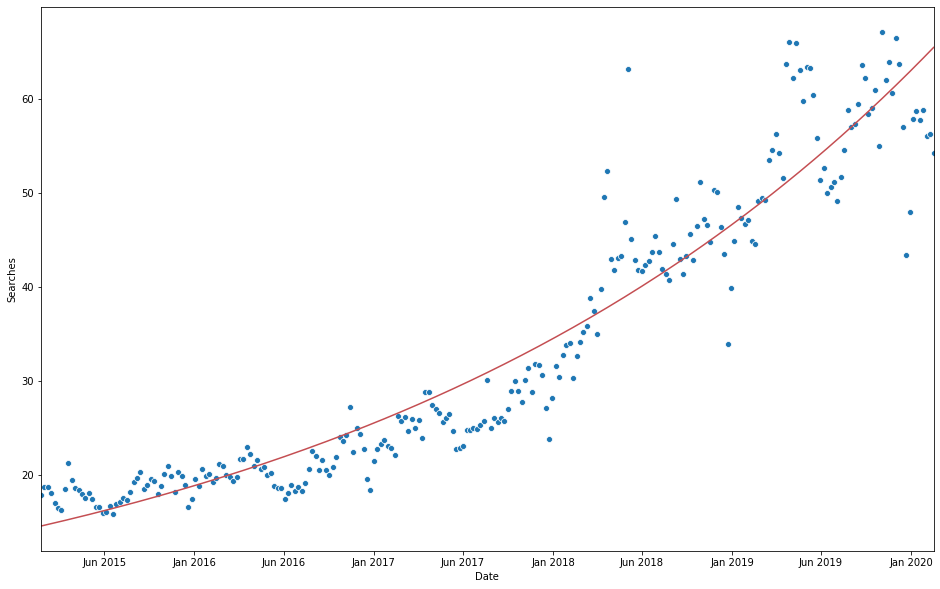

In [154]:
awareness_search["best_fit"] = ans
awareness_search["average"] = y
# ax = sns.scatterplot(data= awareness_search, x="Week", y='Eco Friendly')
# ax = sns.scatterplot(data= awareness_search, x="Week", y='Ocean Plastic')
# ax = sns.scatterplot(data= awareness_search, x="Week", y='Plastic Pollution')
# ax = sns.scatterplot(data= awareness_search, x="Week", y='Reusable')
sns.set_color_codes()
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(data= awareness_search, x="Week", y='average')
ax = sns.lineplot(data= awareness_search, x="Week", y='best_fit', color="r")
ax.set(xlabel='Date', ylabel='Searches', xticklabels=["Jun 2015", "Jan 2016", "Jun 2016", "Jan 2017", 
                                                      "Jun 2017", "Jan 2018", "Jun 2018", "Jan 2019", 
                                                      "Jun 2019", "Jan 2020"])

plt.xlim(['2015-02-22 00:00:00','2020-02-16 00:00:00'])


[Text(0, 0.5, 'Searches'),
 [Text(0, 0, 'Jun 2015'),
  Text(0, 0, 'Jan 2016'),
  Text(0, 0, 'Jun 2016'),
  Text(0, 0, 'Jan 2017'),
  Text(0, 0, 'Jun 2017'),
  Text(0, 0, 'Jan 2018'),
  Text(0, 0, 'Jun 2018'),
  Text(0, 0, 'Jan 2019'),
  Text(0, 0, 'Jun 2019'),
  Text(0, 0, 'Jan 2020')],
 Text(0.5, 0, 'Date')]

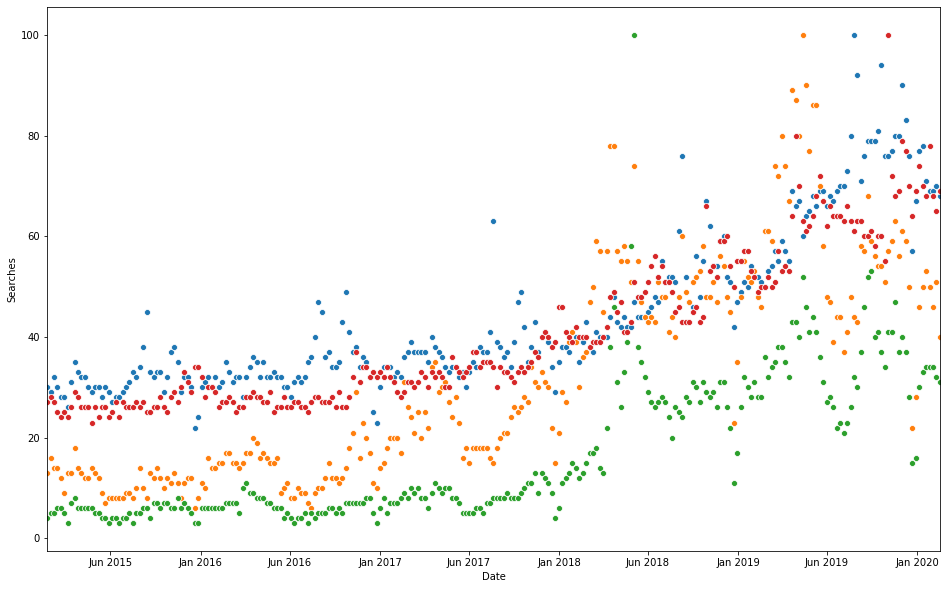

In [159]:
plt.figure(figsize=(16, 10))
ax1 = sns.scatterplot(data= awareness_search, x="Week", y='Eco Friendly')
ax1 = sns.scatterplot(data= awareness_search, x="Week", y='Ocean Plastic')
ax1 = sns.scatterplot(data= awareness_search, x="Week", y='Plastic Pollution')
ax1 = sns.scatterplot(data= awareness_search, x="Week", y='Reusable')
plt.xlim(['2015-02-22 00:00:00','2020-02-16 00:00:00'])
ax1.set(xlabel='Date', ylabel='Searches', xticklabels=["Jun 2015", "Jan 2016", "Jun 2016", "Jan 2017", 
                                                      "Jun 2017", "Jan 2018", "Jun 2018", "Jan 2019", 
                                                      "Jun 2019", "Jan 2020"])

### Bottled Water popularity 

In [106]:
def lin_reg(X, Y):

    xbar = np.mean(X)
    ybar = np.mean(Y)
    n = len(X)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    m = numer / denum
    b = ybar - m * xbar

    return m, b

In [115]:
grouped_bw = bottled_water.groupby("Week").mean()
grouped_bw = grouped_bw.reset_index()
grouped_bw['Total'] = grouped_bw.mean(axis=1)
grouped_bw.head()

,Week,Aquafina,Dasani,Poland Spring,SmartWater,Total
0,2015-02-22,13,14,77,41,36.25
1,2015-03-01,14,13,67,37,32.75
2,2015-03-08,15,13,77,52,39.25
3,2015-03-15,14,12,69,43,34.50
4,2015-03-22,17,13,79,43,38.00


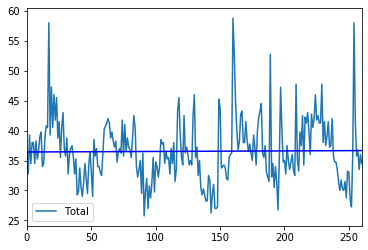

In [145]:
ax1 = grouped_bw.plot.line(y = "Total")
x = np.array(grouped_bw.index)
# x = [float(i) for i in grouped_bw.index.tolist()]
bw_m, bw_b = lin_reg(x, grouped_bw["Total"])
plt.plot(x, bw_m*x+bw_b, 'b', label='US')


### Water Bottle Popularity 

In [148]:
grouped_wb = water_bottle.groupby("Week").mean()
grouped_wb = grouped_wb.reset_index()
grouped_wb['Total'] = grouped_wb.mean(axis=1)
grouped_wb.head()

,Week,Hydro Flask,Yeti,Camelbak,Contigo,Swell,Total
0,2015-02-22,2,34,61,100,53,50.0
1,2015-03-01,2,32,72,95,55,51.2
2,2015-03-08,2,34,72,94,60,52.4
3,2015-03-15,2,36,77,97,58,54.0
4,2015-03-22,2,36,71,92,57,51.6


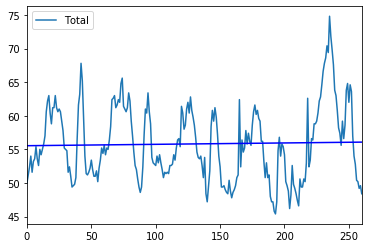

In [149]:
ax2 = grouped_wb.plot.line(y = "Total")
x = np.array(grouped_wb.index)
# x = [float(i) for i in grouped_bw.index.tolist()]
wb_m, wb_b = lin_reg(x, grouped_wb["Total"])
plt.plot(x, wb_m*x+wb_b, 'b', label='US')


### Bottled Water vs. Resuable Bottle

In [155]:
ggl_bottledwater = pd.read_csv("./data/ggl_bottledwater.csv")
ggl_reusablebottle = pd.read_csv("./data/ggl_reusable_bottle.csv")

In [156]:
ggl_bottledwater = ggl_bottledwater.drop("Week")
ggl_bottledwater = ggl_bottledwater.rename(columns = {"Category: All categories" : "Bottled Water"})
ggl_bottledwater["Bottled Water"] = ggl_bottledwater["Bottled Water"].astype(int)

ggl_reusablebottle = ggl_reusablebottle.drop("Week")
ggl_reusablebottle = ggl_reusablebottle.rename(columns = {"Category: All categories" : "Reusable Bottle"})
ggl_reusablebottle["Reusable Bottle"] = ggl_reusablebottle["Reusable Bottle"].astype(int)

In [158]:
df = pd.concat([ggl_reusablebottle, ggl_bottledwater], axis=1)
df["Week"] = pd.to_datetime(awareness_search.index)
df.head()

,Reusable Bottle,Bottled Water,Week
2015-02-22,24,16,2015-02-22
2015-03-01,23,15,2015-03-01
2015-03-08,37,16,2015-03-08
2015-03-15,36,16,2015-03-15
2015-03-22,34,15,2015-03-22


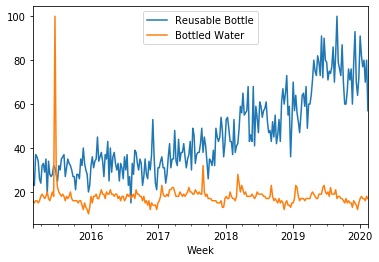

In [159]:
df.plot(x = "Week")

### ALPLA sales
https://www.wsj.com/market-data/quotes/FR/XPAR/ALPLA/financials/annual/income-statement
year is in EUR thousands

In [164]:
alpla = pd.DataFrame(index = [2014, 2015, 2016, 2017, 2018])
# alpla.index = [2014, 2015, 2016, 2017, 2018]
alpla["sales"] = [6517.0, 6872.4, 7530.6, 8160.5, 6448.7]

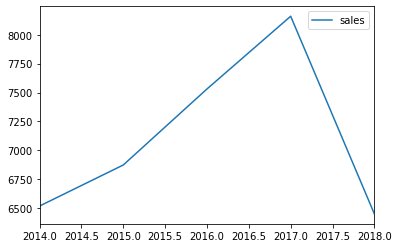

In [165]:
alpla.plot()